## Project 8: Numerical Integration


### Abstract & Description:

This project is about using numerical techniques to integrate functions that are not integrable. We will use this idea to investigate the period of a simple pendulum. To do so, we collected data from a real pendulum and we will compare them to the exact theory, obtained using simpson's integration technique, to the small angle approximation, and to the very small angle approximation. The set of angle is at it follows:[5,10,15,20,25,30,35,40,45,50,55,60,65,70]
Using the curve-fitting function helped us obtain different values of $\omega$ at different angles:

[5 deg] = 3.4683  (used as  $\omega_0$ )

[25 deg] = 3.4431

[25 deg] = 3.4264

[30 deg]= 3.4094

[40 deg] = 3.3623

[50 deg]=  3.3120

[60 deg] = 3.2415

### Algorithm and Discussion
Let's say we have a system with a potential energy given by some, possibly complex expression $U(x)$. For any system with position $x$ and a potential energy $U$ we have:

$$
E = {1 \over 2}m\left(\frac{dx}{dt}\right)^2 + U(x).
$$
If we solve this for $dx/dt$ we get the result we want: $$
 \frac{dx}{dt} = \sqrt{2(E - U(x))/m}.
$$

or, solving for $dt$ we get:

$$
dt = \sqrt{m \over 2 (E-U(x)) } dx.
$$
If the system is bound we can get the time for one oscillation by integrating the time for one complete period! If the potential is symmetric with respect to $x$ then we only have to do 1/4 of a period and multiply by 4:

$$
T = 4 \int_0^{x_{\rm max}} \sqrt{m \over 2 (E-U(x)) } dx.
$$
Let's apply this idea to the simple pendulum. Use this potential (and use polar coordinates!) to study the simple pendulum:

$$
U(\theta) = -mgl {\rm cos}(\theta)
$$
Use this idea to show that for small values of $\theta_m$ the result is the same as we got in General Physics ($T = 2 \pi \sqrt{l/g}$). You can watch the slides for this lesson see how to carry out the expansion to the next order and find the second order correction to this result. To do the integral it helps to first use: ${\rm cos}\,\theta = 1 - 2 {\rm sin}^2\,(\theta/2)$ and a similar substitution for ${\rm cos}\,\theta_m$. Then change variables to ${\rm sin}\,\phi = {\rm sin}\,(\theta/2)/
{\rm sin}\,(\theta_m/2)$.Then expand in powers of $\theta_m$ At the last step before expansion you should have:

$$
4 \sqrt {l/g} \int_0^{\pi/2} {d\phi \over {\sqrt{1 - \sin^2\phi \sin^2{\theta_m \over 2}}}}
$$
The integral here is called the "Complete Elliptic Integral of the First Kind". It's famous. It's impossible to do in closed form.

However, we can approximate it in several ways. First, we can evautate the integral numerically using Simpon's Rule or we can estimate the value of the integral by using a Taylor Expansion WRT a small parameter (in our case the amplitude of the pendulum) to get a series that gives us a correction to the simple theory.


In [522]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [523]:
import pandas as pd
from scipy.optimize import curve_fit
from glob import glob
amps=[]
periods=[]

In [524]:
flist = [
    ["Pend05degrees.csv",18,27],
    ["Pend10degrees.csv",12,19],
    ["pend15degrees.csv",16,25],
    ["Pend20degrees.csv",29,36],
    ["Pend25degrees.csv",12,20],
    ["Pend30degrees.csv",52,60],
    ["Pend35degrees.csv",18,36],
    ["Pend40degrees.csv",37,45],
    ["Pend45degrees.csv",14,30],
    ["Pend50degrees.csv",15,31],
    ["Pend55degrees.csv",14,30],
    ["Pend60degrees.csv",14,22],
    ["Pend65degrees.csv",12,21],
    ["Pend70degrees.csv",34,43],
]


-
ANGLE VS TIME 
-
ANGLE VS TIME 


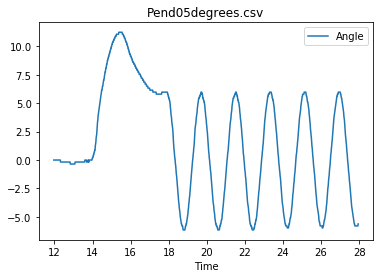

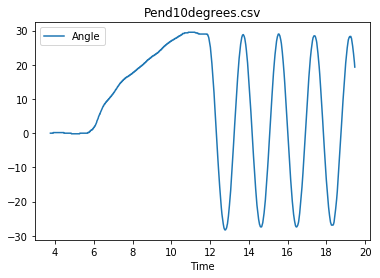

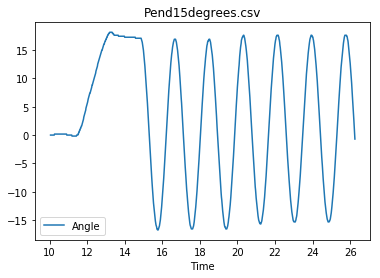

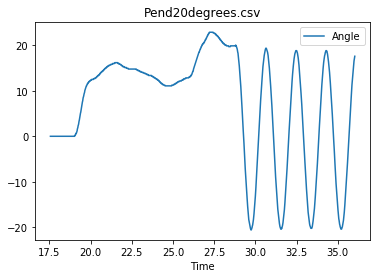

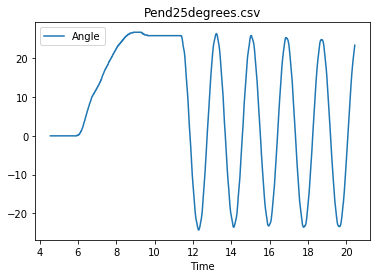

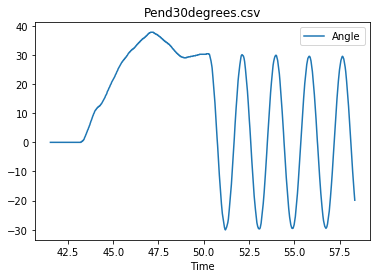

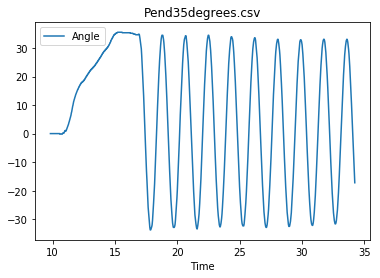

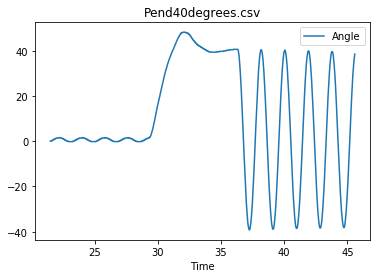

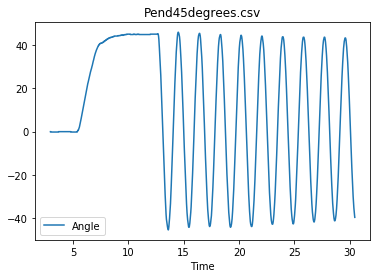

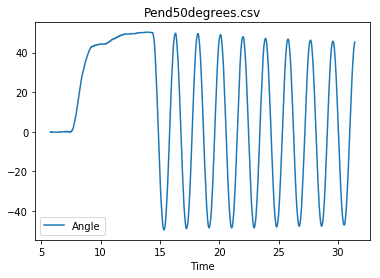

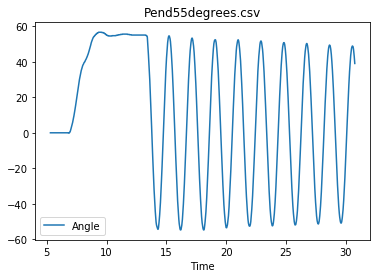

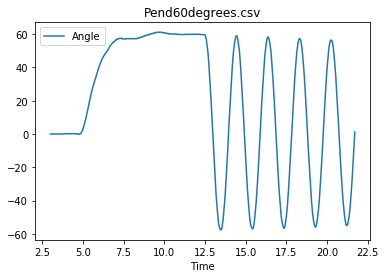

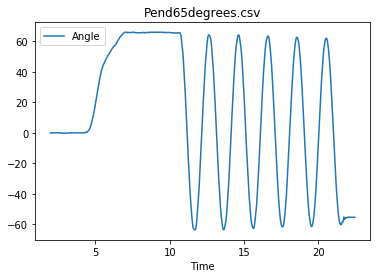

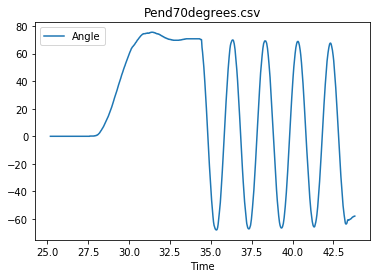

In [525]:

for fname in glob("*.csv"):
    try:
        df = pd.read_csv(fname)
        df.plot("Time","Angle",title=fname)
    except KeyError:
        print("-")
        print("ANGLE VS TIME ")

Omega = 3.4683 +/- 0.0004
phi = 2.35 +/- 0.01
A = 6.02 +/- 0.01
offset = -0.06 +/- 0.01


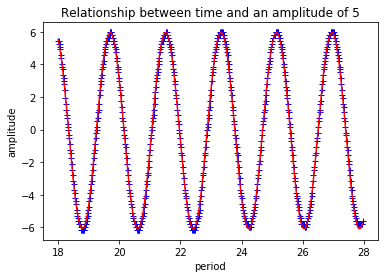

In [526]:
af=pd.read_csv('Pend05degrees.csv')

af= af.rename(columns={'Time': 't'})
af= af.rename(columns={'Angle': 'a'})
af=af[(af.t>18)]
def sinFit(t,omega,phi,A,offset):
    return A*np.sin(omega*t + phi) + offset

dtheta = 360.0/1000
sig=np.ones(len(af.t))*dtheta       #Error in angle
T=1.8
omega0 = 2*np.pi/T
A0=6
phi0=0.0
offset0=0.0

par, cov = curve_fit(sinFit, af.t, af.a, p0=(omega0,phi0,A0,offset0), sigma=sig)

omega01,phi,A01,offset = par
dOmega, dPhi, dA, dOffset = np.sqrt(np.diag(cov))

plt.plot(af.t, af.a, 'b+')
plt.plot(af.t, sinFit(af.t, omega01, phi, A01, offset),'r-')
plt.title("Relationship between time and an amplitude of 5")
plt.ylabel("amplitude")
plt.xlabel("period")

print("Omega = %4.4f +/- %4.4f" % (omega01, dOmega))
print("phi = %4.2f +/- %4.2f" % (phi, dPhi))
print("A = %4.2f +/- %4.2f" % (A01, dA))
print("offset = %4.2f +/- %4.2f" % (offset, dOffset))

Omega = 3.4431 +/- 0.0004
phi = 2.85 +/- 0.01
A = 19.67 +/- 0.02
offset = -0.73 +/- 0.01


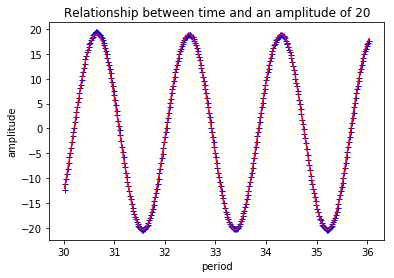

In [527]:
bf=pd.read_csv('Pend20degrees.csv')
bf = bf.rename(columns={'Time': 't'})
bf = bf.rename(columns={'Angle': 'a'})
bf=bf[(bf.t>30)]
def sinFit(t,omega,phi,A,offset):
    return A*np.sin(omega*t + phi) + offset

dtheta = 360.0/1000
sig=np.ones(len(bf.t))*dtheta  # error in angle
T=1.8
omega0 = 2*np.pi/T
A0=30
phi0=0.0
offset0=0.0


par, cov = curve_fit(sinFit, bf.t, bf.a, p0=(omega0,phi0,A0,offset0), sigma=sig)

omega,phi,A,offset = par
dOmega, dPhi, dA, dOffset = np.sqrt(np.diag(cov))

plt.plot(bf.t, bf.a, 'b+')
plt.plot(bf.t, sinFit(bf.t, omega, phi, A, offset),'r-')
plt.title("Relationship between time and an amplitude of 20")
plt.ylabel("amplitude")
plt.xlabel("period")
print("Omega = %4.4f +/- %4.4f" % (omega, dOmega))
print("phi = %4.2f +/- %4.2f" % (phi, dPhi))
print("A = %4.2f +/- %4.2f" % (A, dA))
print("offset = %4.2f +/- %4.2f" % (offset, dOffset))


Omega = 3.4294 +/- 0.0004
phi = 0.24 +/- 0.01
A = 24.57 +/- 0.02
offset = 0.93 +/- 0.02


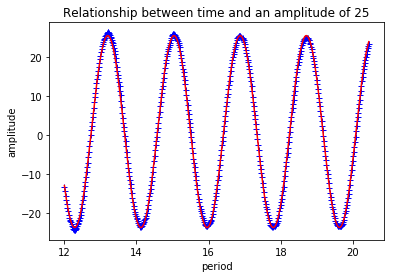

In [528]:
cf=pd.read_csv('Pend25degrees.csv')
cf = cf.rename(columns={'Time': 't'})
cf = cf.rename(columns={'Angle': 'a'})
cf=cf[(cf.t>12)]
def sinFit(t,omega,phi,A,offset):
    return A*np.sin(omega*t + phi) + offset

dtheta = 360.0/1000
sig=np.ones(len(cf.t))*dtheta  # error in angle
T=1.8
omega0 = 2*np.pi/T
A0=30
phi0=0.0
offset0=0.0



par, cov = curve_fit(sinFit, cf.t, cf.a, p0=(omega0,phi0,A0,offset0), sigma=sig)

omega,phi,A,offset = par
dOmega, dPhi, dA, dOffset = np.sqrt(np.diag(cov))

plt.plot(cf.t, cf.a, 'b+')
plt.plot(cf.t, sinFit(cf.t, omega, phi, A, offset),'r-')
plt.title("Relationship between time and an amplitude of 25")
plt.ylabel("amplitude")
plt.xlabel("period")
print("Omega = %4.4f +/- %4.4f" % (omega, dOmega))
print("phi = %4.2f +/- %4.2f" % (phi, dPhi))
print("A = %4.2f +/- %4.2f" % (A, dA))
print("offset = %4.2f +/- %4.2f" % (offset, dOffset))


Omega = 3.4094 +/- 0.0003
phi = 6.04 +/- 0.01
A = 29.72 +/- 0.01
offset = 0.02 +/- 0.01


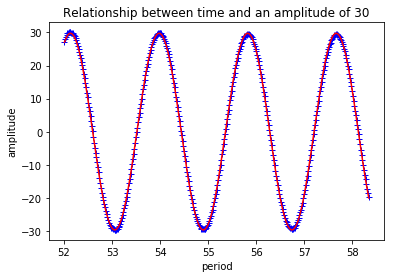

In [534]:
xf=pd.read_csv('Pend30degrees.csv')
xf = xf.rename(columns={'Time': 't'})
xf = xf.rename(columns={'Angle': 'a'})
xf=xf[(xf.t>52)]
def sinFit(t,omega,phi,A,offset):
    return A*np.sin(omega*t + phi) + offset

dtheta = 360.0/1000
sig=np.ones(len(xf.t))*dtheta  # error in angle
T=1.8
omega0 = 2*np.pi/T
A0=30
phi0=0.0
offset0=0.0



par, cov = curve_fit(sinFit, xf.t, xf.a, p0=(omega0,phi0,A0,offset0), sigma=sig)

omega,phi,A,offset = par
dOmega, dPhi, dA, dOffset = np.sqrt(np.diag(cov))

plt.plot(xf.t, xf.a, 'b+')
plt.plot(xf.t, sinFit(xf.t, omega, phi, A, offset),'r-')
plt.title("Relationship between time and an amplitude of 30")
plt.ylabel("amplitude")
plt.xlabel("period")
print("Omega = %4.4f +/- %4.4f" % (omega, dOmega))
print("phi = %4.2f +/- %4.2f" % (phi, dPhi))
print("A = %4.2f +/- %4.2f" % (A, dA))
print("offset = %4.2f +/- %4.2f" % (offset, dOffset))


Omega = 3.3623 +/- 0.0002
phi = 5.14 +/- 0.01
A = 39.41 +/- 0.02
offset = 0.67 +/- 0.01


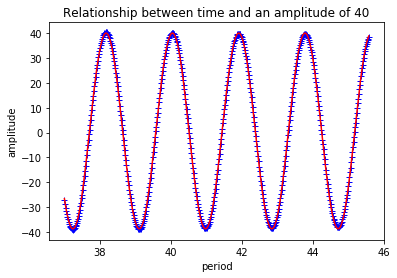

In [530]:
yf=pd.read_csv('Pend40degrees.csv')
yf = yf.rename(columns={'Time': 't'})
yf = yf.rename(columns={'Angle': 'a'})
yf=yf[(yf.t>37)]
def sinFit(t,omega,phi,A,offset):
    return A*np.sin(omega*t + phi) + offset

dtheta = 360.0/1000
sig=np.ones(len(yf.t))*dtheta  # error in angle
T=1.8
omega0 = 2*np.pi/T
A0=30
phi0=0.0
offset0=0.0

par, cov = curve_fit(sinFit, yf.t, yf.a, p0=(omega0,phi0,A0,offset0), sigma=sig)

omega,phi,A,offset = par
dOmega, dPhi, dA, dOffset = np.sqrt(np.diag(cov))

plt.plot(yf.t, yf.a, 'b+')
plt.plot(yf.t, sinFit(yf.t, omega, phi, A, offset),'r-')
plt.title("Relationship between time and an amplitude of 40")
plt.ylabel("amplitude")
plt.xlabel("period")
print("Omega = %4.4f +/- %4.4f" % (omega, dOmega))
print("phi = %4.2f +/- %4.2f" % (phi, dPhi))
print("A = %4.2f +/- %4.2f" % (A, dA))
print("offset = %4.2f +/- %4.2f" % (offset, dOffset))


Omega = 3.3120 +/- 0.0002
phi = 4.13 +/- 0.01
A = 47.98 +/- 0.04
offset = -0.26 +/- 0.03


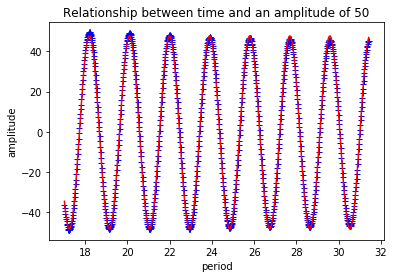

In [531]:

ef=pd.read_csv('Pend50degrees.csv')
ef = ef.rename(columns={'Time': 't'})
ef = ef.rename(columns={'Angle': 'a'})
ef=ef[(ef.t>17)]
def sinFit(t,omega,phi,A,offset):
    return A*np.sin(omega*t + phi) + offset

dtheta = 360.0/1000
sig=np.ones(len(ef.t))*dtheta  # error in angle
T=1.8
omega0 = 2*np.pi/T
A0=30
phi0=0.0
offset0=0.0

par, cov = curve_fit(sinFit, ef.t, ef.a, p0=(omega0,phi0,A0,offset0), sigma=sig)

omega,phi,A,offset = par
dOmega, dPhi, dA, dOffset = np.sqrt(np.diag(cov))

plt.plot(ef.t, ef.a, 'b+')
plt.plot(ef.t, sinFit(ef.t, omega, phi, A, offset),'r-')
plt.title("Relationship between time and an amplitude of 50")
plt.ylabel("amplitude")
plt.xlabel("period")
print("Omega = %4.4f +/- %4.4f" % (omega, dOmega))
print("phi = %4.2f +/- %4.2f" % (phi, dPhi))
print("A = %4.2f +/- %4.2f" % (A, dA))
print("offset = %4.2f +/- %4.2f" % (offset, dOffset))


Omega = 3.2429 +/- 0.0004
phi = 5.01 +/- 0.01
A = 56.99 +/- 0.05
offset = 0.58 +/- 0.03


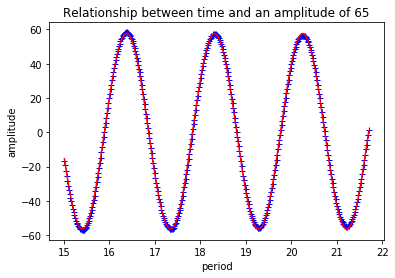

In [532]:
df=pd.read_csv('Pend60degrees.csv')
df = df.rename(columns={'Time': 't'})
df = df.rename(columns={'Angle': 'a'})
df=df[(df.t>15)]
def sinFit(t,omega,phi,A,offset):
    return A*np.sin(omega*t + phi) + offset

dtheta = 360.0/1000
sig=np.ones(len(df.t))*dtheta  # error in angle
T=1.8
omega0 = 2*np.pi/T
A0=30
phi0=0.0
offset0=0.0

par, cov = curve_fit(sinFit, df.t, df.a, p0=(omega0,phi0,A0,offset0), sigma=sig)

omega,phi,A,offset = par
dOmega, dPhi, dA, dOffset = np.sqrt(np.diag(cov))
0
plt.plot(df.t, df.a, 'b+')
plt.plot(df.t, sinFit(df.t, omega, phi, A, offset),'r-')
plt.title("Relationship between time and an amplitude of 65")
plt.ylabel("amplitude")
plt.xlabel("period")
print("Omega = %4.4f +/- %4.4f" % (omega, dOmega))
print("phi = %4.2f +/- %4.2f" % (phi, dPhi))
print("A = %4.2f +/- %4.2f" % (A, dA))
print("offset = %4.2f +/- %4.2f" % (offset, dOffset))


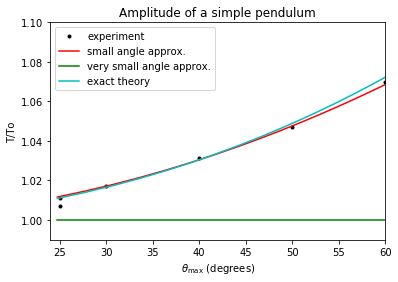

In [543]:
import os
import csv
omg = [3.4683,3.4431,3.4294,3.4094,3.3623,3.3120,3.2415]
angs = [5,25,25,30,40,50,60]
fname = 'rawdata.csv'
dataFile = open(os.path.join('',fname))
reader = csv.reader(dataFile, delimiter=',')
reader
lineCnt=0
t1_list=[]
t2_list=[]
theta1_list=[]
theta2_list=[]
i=0
omega0 = 3.4683
T0 = 2*pi/omega0
ratio = []
while(i<7):
    omg[i] = 2*pi/omg[i]
    ratio.append(omg[i]/T0) 
    i = i+1

for line in reader:
    if lineCnt in [0]:
        pass
    else:
        try:
            t1_list.append(float(line[0]))
            theta1_list.append(float(line[1])*pi/180.0)  # convert to radians
            t2_list.append(float(line[2]))
            Tf.append(float(line[4]));
            theta2_list.append(float(line[3])*pi/180.0)  # convert to radians
        except:
            print(".", line)
    
    lineCnt+=1

N=len(t1_list)
t1arr=array(t1_list)
t2arr=array(t2_list)
th1arr=array(theta1_list)+offset # theta 1 corrected for offset
th2arr=array(theta2_list)+offset # theta 2 corrected for offset
   # array of experimental periods devided by zero amplitude period
thAvg = (th1arr+th2arr)/2.0
vsaa = 1.0*ones(N)
saa = 1.0+thAvg*thAvg/16
def simpson(f, a, b, N, args=None):
    if args is None:
        args=[]
    x=np.linspace(a,b,2*N)  # sample the function
    h=(b-a)/(2*N-1)
    y=f(*([x] +list(args)))
    evens =  y[2:-2:2]
    odds = y[1:-1:2]
    return (y[0] + y[-1] + 2*odds.sum() + 4*evens.sum())*h/3.0

def K_int(phi, m):
    return 1.0/np.sqrt(1-m*np.sin(phi)**2)

def K(m, N=1000):
    return simpson(K_int, 0, np.pi/2, N=N, args=(m,))

sraList=[]
for theta in thAvg:
    sraList.append(2*K(sin(theta/2.0)**2)/pi)

thDeg=thAvg*180/pi


  # array of average amplitudes (in radians)

title("Amplitude of a simple pendulum")
xlabel("$\\theta_{\\rm max}$ (degrees)")
ylabel("T/To")
axis([24,60,0.99,1.1])
plot(angs, ratio,'k.', label="experiment")
plot(thDeg[0:25], saa, 'r-',label="small angle approx.")
plot(thDeg[0:25], vsaa, 'g-', label="very small angle approx.")
plot(thDeg[0:25], sraList, 'c-', label="exact theory")
legend(loc=2)


### Results

We collected several data for different angles. Here are the ones picked to complete our project:

* Omega : Angular velocity 

* phi: Phase term

* Amplitude: Measure of the change over a single period.

* Offset: It depends on the postion of the coordinate system. It may vary, but it should not affect the outcome of the experiment.

##### 5 Degree:
* Omega = 3.4683 +/- 0.0004

* phi = 2.35 +/- 0.01

* A = 6.02 +/- 0.01

* offset = -0.06 +/- 0.01

##### 20 Degree:

* Omega = 3.4431 +/- 0.0004

* phi = 2.85 +/- 0.01

* A = 19.67 +/- 0.02

* offset = -0.73 +/- 0.01

##### 25 Degree:

* Omega = 3.4294 +/- 0.0004

* phi = 0.24 +/- 0.01

* A = 24.57 +/- 0.02

* offset = 0.93 +/- 0.02

##### 30 Degree: 

* Omega = 3.4094 +/- 0.0003

* phi = 6.04 +/- 0.01

* A = 29.72 +/- 0.01

* offset = 0.02 +/- 0.01

##### 40 Degree:

* Omega = 3.3623 +/- 0.0002

* phi = 5.14 +/- 0.01

* A = 39.41 +/- 0.02

* offset = 0.67 +/- 0.01

##### 50 Degree:

* Omega = 3.3120 +/- 0.0002

* phi = 4.13 +/- 0.01

* A = 47.98 +/- 0.04

* offset = -0.26 +/- 0.03

##### 60 Degree: 

* Omega = 3.2429 +/- 0.0004

* phi = 5.01 +/- 0.01

* A = 56.99 +/- 0.05

* offset = 0.58 +/- 0.03


### Conclusion


We have just demonstrated that for large angles, the period of oscillations of a simple pendulum $2\pi(\frac{l}{g})^.5$ fails. That is why we used the following integral: $
4 \sqrt {l/g} \int_0^{\pi/2} {d\phi \over {\sqrt{1 - \sin^2\phi \sin^2{\theta_m \over 2}}}}
$in order to study how the pendulum behaves over time, at different angles.
Being unable to solve such an equation, we used a numerical integration technique, Simpson's technique. The $\\theta_{\\rm max}$ vs T/T0 shows the ratio in the amplitude.
